<h1 style="text-align:center;"><b>Proyecto 2</b></h1>
<h3 style="text-align:center;">Daniel Machic (22118) y  MariaJosé Ramirez (221051) </h3>

---
# Análisis Exploratorio
## 1. Planteamiento inicial del problema  

### a. Situación problemática  
Las plataformas de redes sociales, como Reddit, enfrentan el reto de moderar millones de comentarios diariamente. Una proporción significativa de estos contiene **lenguaje tóxico, discriminatorio o violaciones explícitas de reglas comunitarias**. La moderación manual es costosa, lenta y poco escalable, lo que limita la capacidad de garantizar un ambiente sano de interacción (Jigsaw/Conversation AI, 2025).  

### b. Problema científico  
¿Es posible desarrollar un **modelo de aprendizaje automático** que clasifique con precisión y de manera eficiente si un comentario viola una regla específica de la comunidad, apoyando así a los moderadores en la toma de decisiones?  

### c. Objetivos  

- **General:**  
Desarrollar un modelo de *machine learning* capaz de clasificar comentarios de Reddit en dos categorías: violan o no violan una regla comunitaria.  

- **Específicos:**  
1. Realizar un análisis exploratorio de datos (EDA) para identificar patrones lingüísticos asociados con violaciones de reglas.  
2. Implementar un preprocesamiento adecuado del texto (normalización, tokenización, embeddings).  
3. Entrenar y comparar diferentes modelos de clasificación de texto (Naive Bayes, SVM, BERT, RoBERTa).  
4. Evaluar el rendimiento mediante métricas como **AUC, F1-score y accuracy**.  
5. Analizar falsos positivos y negativos para entender las limitaciones del modelo.  

---

## 2. Investigación preliminar sobre la detección de patrones en texto y contenido tóxico  

### Detección de patrones en texto  
La detección de lenguaje dañino ha sido estudiada en el área de **Procesamiento de Lenguaje Natural (PLN)**.  

- **Métodos tradicionales**: Uso de diccionarios de palabras prohibidas, listas negras y expresiones regulares. Son fáciles de implementar, pero **no capturan contexto ni sarcasmo**, lo que genera errores frecuentes (Davidson et al., 2017).  
- **Modelos de aprendizaje automático clásico**: SVM, Naive Bayes y regresión logística con *features* como n-gramas o TF-IDF. Su rendimiento depende fuertemente de la **ingeniería de características** (Wulczyn et al., 2017).  
- **Redes neuronales profundas**:  
  - **RNNs y LSTMs** → efectivas en secuencias textuales largas, pero limitadas en escalabilidad.  
  - **Transformers (BERT, RoBERTa, DistilBERT)** → *state-of-the-art* en clasificación de texto, logran comprender ironía, sarcasmo y contexto global (Devlin et al., 2019; Kumar et al., 2025).  

### Estrategias de moderación en comunidades digitales  
- **Reglas explícitas**: muchas comunidades definen normas sobre insultos, incitación al odio, spam, desinformación, etc.  
- **Contexto cultural**: lo que es ofensivo en un subreddit puede ser aceptado en otro (Chandrasekharan et al., 2018).  
- **Herramientas actuales**: Jigsaw y Conversation AI han desarrollado sistemas como *Perspective API* para evaluar toxicidad de textos en tiempo real.  

---

## 3. Análisis inicial del problema y los datos disponibles  

### Descripción del problema  
El reto de Kaggle **“Jigsaw - Agile Community Rules Classification”** consiste en desarrollar un clasificador binario que prediga si un comentario viola una regla específica de la comunidad.  

### Descripción del dataset  
- **Fuente**: comentarios de Reddit, moderados por equipos humanos.  
- **Variables principales**:  
  - `row_id`: identificador único.  
  - `comment_text`: texto del comentario.  
  - `rule_violation`: etiqueta binaria (0 = no violación, 1 = violación).  
- **Particiones**:  
  - `train.csv`: dataset con ejemplos etiquetados.  
  - `test.csv`: dataset sin etiquetas (para predicciones).  
  - `dev.csv`: pequeño conjunto de validación inicial.  

### Observaciones iniciales  
- Existe **desequilibrio de clases**: pocos comentarios violan reglas comparado con los que no lo hacen.  
- Los textos contienen **sarcasmo, abreviaciones, jerga y errores gramaticales**, lo que complica el análisis.  
- Se requiere un **modelo robusto** que pueda generalizar entre distintos subreddits.  

---

## 4. Preprocesamiento de datos  

### a. Carga y organización  
- Unificación de `train` y `dev` en un único `DataFrame`.  
- Revisión de duplicados y comentarios vacíos.  

### b. Limpieza del texto  
- Conversión a minúsculas.  
- Eliminación de URLs, menciones (@usuario) y hashtags.  
- Normalización de espacios y caracteres especiales.  

### c. Tokenización  
- Uso de **tokenizadores pre-entrenados** (ej. BERT tokenizer).  
- Alternativamente: n-gramas con TF-IDF para modelos clásicos.  

### d. Manejo de stopwords  
- Se eliminan en enfoques tradicionales, pero **se conservan en Transformers** ya que aportan contexto.  

### e. Normalización y embeddings  
- **TF-IDF** → para modelos clásicos.  
- **Embeddings pre-entrenados** → GloVe, Word2Vec.  
- **Transformers embeddings** → contextualizados, recomendados.  

### f. Balanceo de clases  
- **Oversampling**: duplicar ejemplos minoritarios.  
- **Undersampling**: reducir mayoría.  
- **Class weights**: ponderar errores de la clase minoritaria.  

### g. División del dataset  
- 80% entrenamiento – 20% validación, estratificado según `rule_violation`.  

---

## 5. Análisis exploratorio de datos (EDA)  

### a. Distribución de clases  
- Histograma mostrando proporción de comentarios violatorios vs. no violatorios.  

### b. Longitud de comentarios  
- Histograma de número de palabras.  
- Posible correlación: los comentarios más largos tienden a ser más ofensivos.  

### c. Nube de palabras  
- Palabras más frecuentes en cada clase (violatorio vs. no violatorio).  

### d. N-gramas  
- Identificación de bigramas y trigramas frecuentes en comentarios ofensivos.  

### e. Análisis de sentimiento  
- Comparación del tono general de comentarios violatorios y no violatorios.  



### * Análisis Exploratorio

* *Cargar datos*

In [5]:
import pandas as pd

# Leer los archivos CSV
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

# Mostrar información básica
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample_submission.shape)

# Ver las primeras filas de cada dataset
print("\nTrain head:")
print(train.head())

print("\nTest head:")
print(test.head())

print("\nSample submission head:")
print(sample_submission.head())


Train shape: (2029, 9)
Test shape: (10, 8)
Sample submission shape: (10, 2)

Train head:
   row_id                                               body  \
0       0  Banks don't want you to know this! Click here ...   
1       1  SD Stream [ ENG Link 1] (http://www.sportsstre...   
2       2  Lol. Try appealing the ban and say you won't d...   
3       3  she will come your home open her legs with  an...   
4       4  code free tyrande --->>> [Imgur](http://i.imgu...   

                                                rule      subreddit  \
0  No Advertising: Spam, referral links, unsolici...     Futurology   
1  No Advertising: Spam, referral links, unsolici...  soccerstreams   
2  No legal advice: Do not offer or request legal...   pcmasterrace   
3  No Advertising: Spam, referral links, unsolici...            sex   
4  No Advertising: Spam, referral links, unsolici...    hearthstone   

                                  positive_example_1  \
0  If you could tell your younger self some

In [6]:
import re
# Función de limpieza
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # eliminar URLs
    text = re.sub(r'[^a-z0-9\s]', '', text)  # eliminar caracteres especiales
    text = re.sub(r'\s+', ' ', text).strip()  # eliminar espacios extra
    return text

# Aplicar limpieza
train['clean_body'] = train['body'].apply(clean_text)
test['clean_body'] = test['body'].apply(clean_text)

* **Distribución de Etiquetas**

/tmp/ipython-input-1178781829.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


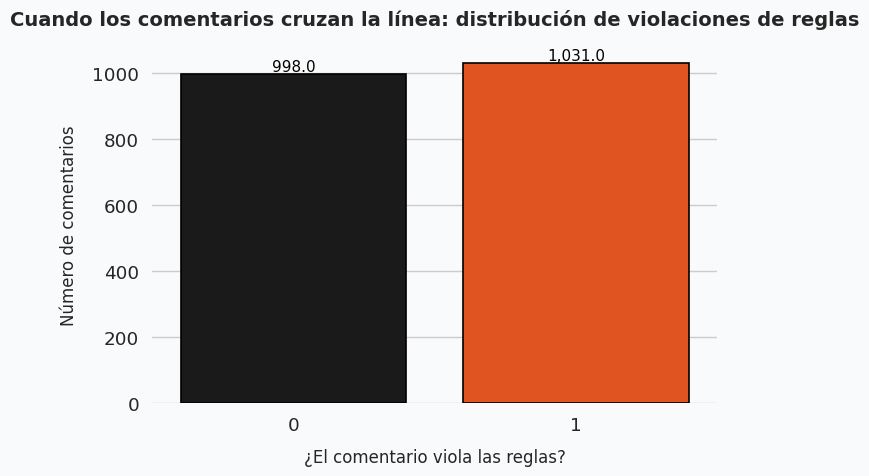

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2, rc={'axes.facecolor':'#F9FAFB', 'figure.facecolor':'#F9FAFB'})


palette = ["#1A1A1B", "#FF4500"]
plt.figure(figsize=(7,5))
ax = sns.countplot(
    x='rule_violation',
    data=train,
    palette=palette,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Cuando los comentarios cruzan la línea: distribución de violaciones de reglas",
          fontsize=14, weight='bold', pad=15)


plt.xlabel("¿El comentario viola las reglas?", fontsize=12, labelpad=10)
plt.ylabel("Número de comentarios", fontsize=12, labelpad=10)


for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', weight='medium')


sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



*Análisis*

El gráfico muestra una distribución casi idéntica entre comentarios que violan las reglas (1) y los que no (0), ambos superando ligeramente los 1000. Esto sugiere un conjunto de datos balanceado, ideal para el entrenamiento de modelos, donde la violación de reglas parece ser un evento frecuente o intencionalmente equilibrado en la muestra.

**Longitud de comentarios**

/tmp/ipython-input-1191776650.py:16: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


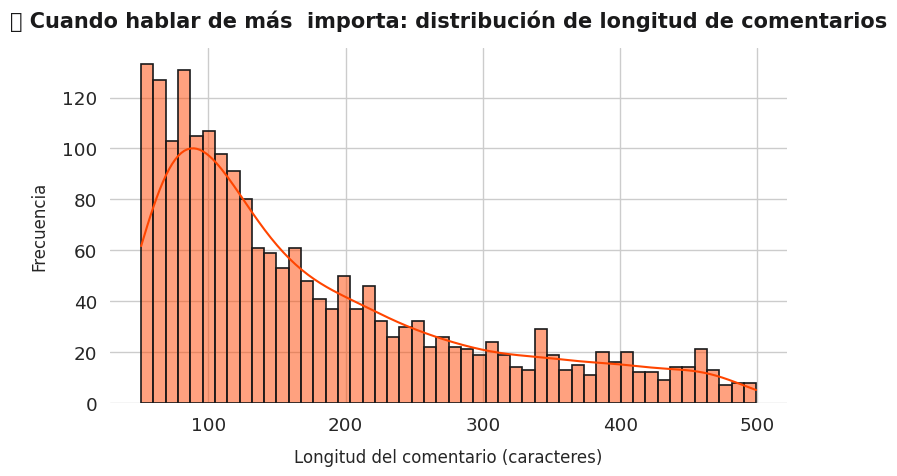

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2, rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})
reddit_palette = ["#1A1A1B", "#FF4500"]

# Calculate the length of the comments and store it in a new column
train['body_length'] = train['body'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(train['body_length'], bins=50, kde=True, color="#FF4500", edgecolor="#1A1A1B", linewidth=1.2)
plt.title("📝 Cuando hablar de más  importa: distribución de longitud de comentarios", fontsize=15, weight='bold', pad=15, color="#1A1A1B")
plt.xlabel("Longitud del comentario (caracteres)", fontsize=12, labelpad=10)
plt.ylabel("Frecuencia", fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

*Análisis*

Este histograma muestra la distribución general de la longitud de todos los comentarios. La curva superpuesta indica la densidad de la distribución, revelando que la mayoría de los comentarios son relativamente cortos, con una frecuencia decreciente a medida que aumenta la longitud del comentario.

**Boxplot de longitud por clase**

/tmp/ipython-input-595080933.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rule_violation', y='body_length', data=train, palette=reddit_palette, linewidth=1.2, fliersize=3)
/tmp/ipython-input-595080933.py:14: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


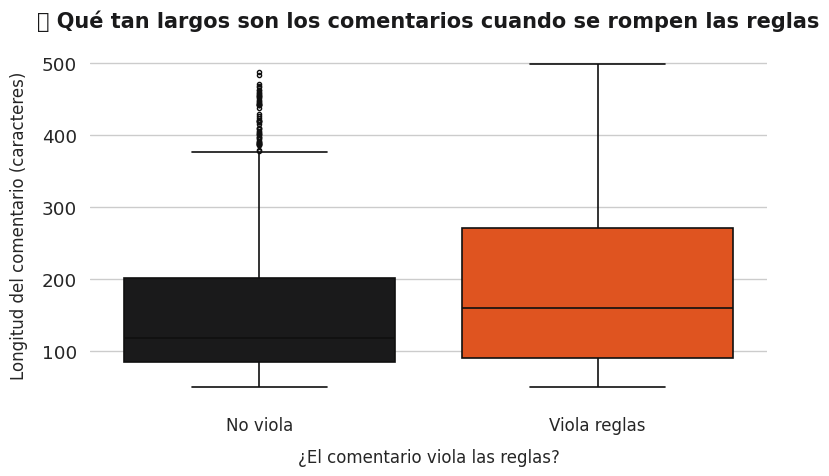

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2, rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})
reddit_palette = ["#1A1A1B", "#FF4500"]

plt.figure(figsize=(8,5))
sns.boxplot(x='rule_violation', y='body_length', data=train, palette=reddit_palette, linewidth=1.2, fliersize=3)
plt.title("💬 Qué tan largos son los comentarios cuando se rompen las reglas", fontsize=15, weight='bold', pad=15, color="#1A1A1B")
plt.xlabel("¿El comentario viola las reglas?", fontsize=12, labelpad=10)
plt.ylabel("Longitud del comentario (caracteres)", fontsize=12, labelpad=10)
plt.xticks([0,1], ["No viola", "Viola reglas"], fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


*Análisis*

Este diagrama de caja compara la distribución de la longitud de los comentarios para dos grupos: aquellos que no violan ninguna regla (0) y aquellos que sí lo hacen (1). Se observa que los comentarios que violan reglas tienden a ser, en promedio, más largos y presentan una mayor variabilidad en su extensión que aquellos que no las violan.

**Nubes de Palabras (Unigramas)**

/tmp/ipython-input-3709775704.py:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


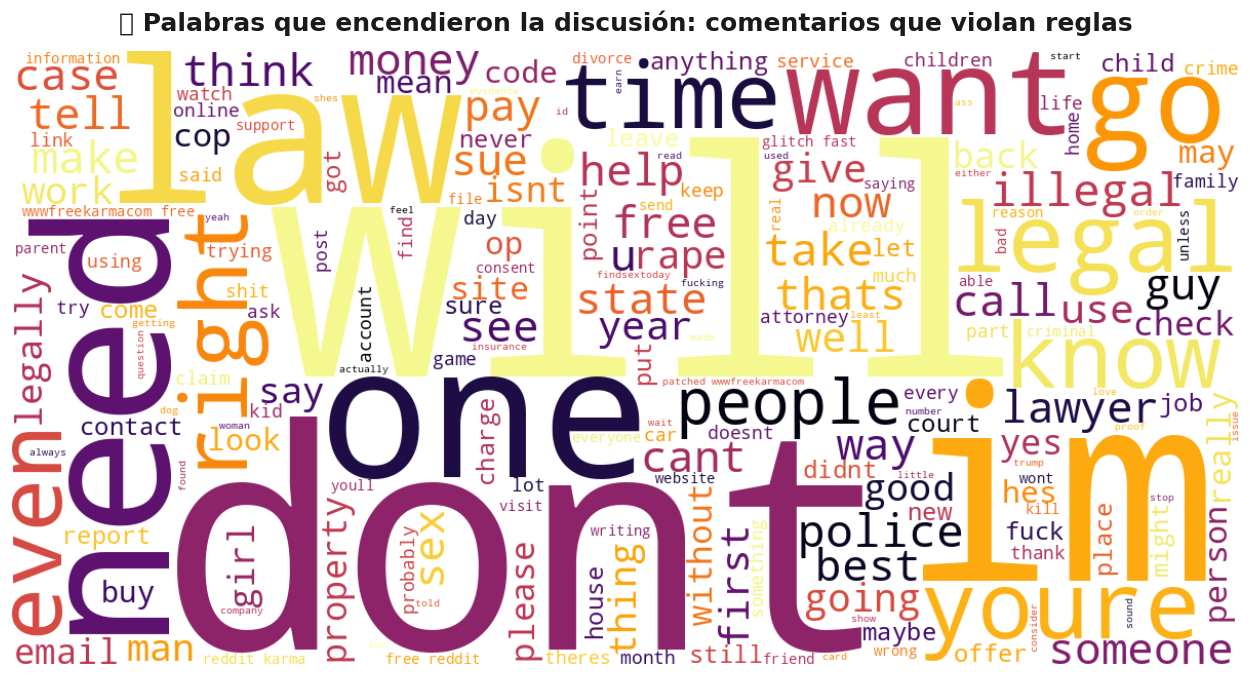

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_violation = ' '.join(train[train['rule_violation'] == 1]['clean_body'])

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='inferno',
    max_words=200,
    contour_color='#FF4500',
    contour_width=2
).generate(text_violation)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🔥 Palabras que encendieron la discusión: comentarios que violan reglas", fontsize=18, weight='bold', pad=15, color="#1A1A1B")
plt.tight_layout()
plt.show()



**Bigramas más comúnes**

/tmp/ipython-input-526302876.py:32: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


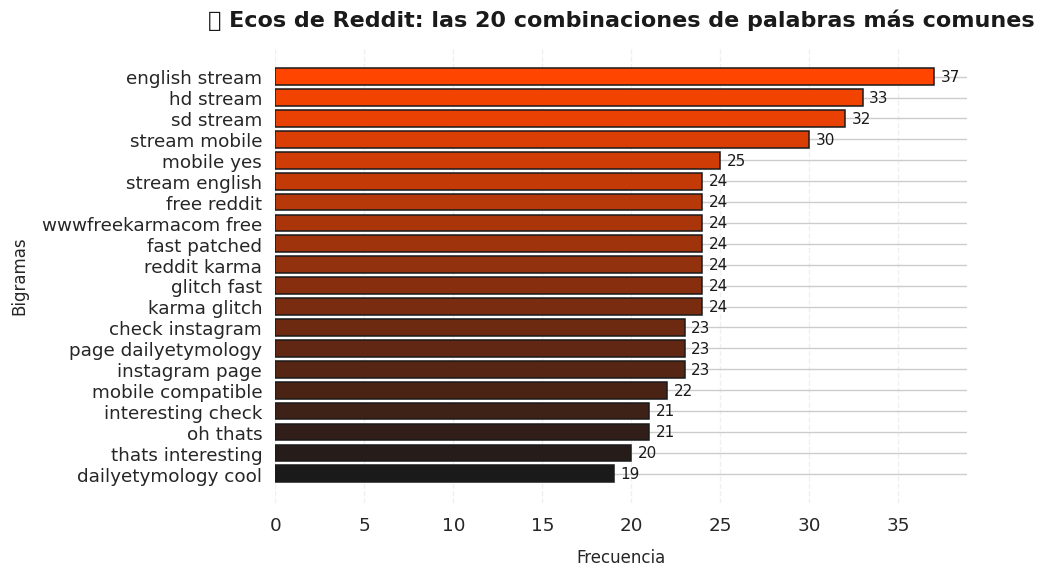

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X2 = vectorizer.fit_transform(train['clean_body'])
sum_words = X2.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

bigrams_df = pd.DataFrame(words_freq, columns=['bigram', 'count'])

sns.set(style="whitegrid", font_scale=1.2, rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

colors = sns.color_palette("blend:#1A1A1B,#FF4500", as_cmap=False, n_colors=20)
bigrams_df = bigrams_df.sort_values("count", ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(bigrams_df['bigram'], bigrams_df['count'], color=colors, edgecolor="#1A1A1B", linewidth=1.1)

plt.title("🧠 Ecos de Reddit: las 20 combinaciones de palabras más comunes", fontsize=16, weight='bold', pad=15, color="#1A1A1B")
plt.xlabel("Frecuencia", fontsize=12, labelpad=10)
plt.ylabel("Bigramas", fontsize=12, labelpad=10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)

for i, v in enumerate(bigrams_df['count']):
    plt.text(v + max(bigrams_df['count']) * 0.01, i, f'{v:,}', va='center', fontsize=11, color="#1A1A1B")

plt.tight_layout()
plt.show()


---

## 6. Conclusiones  

1. El dataset es **apto para entrenar modelos supervisados**, pero presenta **desequilibrio de clases** que debe manejarse.  
2. Los comentarios reflejan **gran diversidad lingüística** (slang, ironía, sarcasmo), lo que requiere modelos avanzados como Transformers.  
3. El preprocesamiento de texto es crítico para **mejorar la calidad de las representaciones** antes de entrenar.  
4. El análisis exploratorio confirma que ciertas palabras y longitudes de comentario se correlacionan con violaciones de reglas.  
5. Se recomienda utilizar **métricas robustas** (AUC y F1-score) más allá de la accuracy.  

---

## 7. Sugerencias para fases posteriores  

1. **Modelos clásicos de base**: Naive Bayes y SVM con TF-IDF.  
2. **Transformers pre-entrenados**: BERT, RoBERTa, DistilBERT para resultados *state-of-the-art*.  
3. **Técnicas de regularización**: dropout, early stopping, fine-tuning controlado.  
4. **Manejo de desequilibrio**: Focal Loss, SMOTE, class weights.  
5. **Análisis de errores**: revisión manual de falsos positivos y negativos para ajustar el preprocesamiento.  
6. **Optimización de hiperparámetros**: Grid Search y Bayesian Optimization.  

---

## Referencias  

- Chandrasekharan, E., Pavalanathan, U., Srinivasan, A., Glynn, A., Eisenstein, J., & Gilbert, E. (2018). *You Can’t Stay Here: The Efficacy of Reddit’s 2015 Ban Examined Through Hate Speech*. Proceedings of the ACM on Human-Computer Interaction, 2(CSCW). https://doi.org/10.1145/3274314  
- Davidson, T., Warmsley, D., Macy, M., & Weber, I. (2017). *Automated Hate Speech Detection and the Problem of Offensive Language*. Proceedings of ICWSM.  
- Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). *BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding*. NAACL.  
- Jigsaw/Conversation AI. (2025). *Jigsaw - Agile Community Rules Classification*. Kaggle. https://www.kaggle.com/competitions/jigsaw-agile-community-rules  
- Kumar, S., AbuHashem, M., & Durumeric, Z. (2025). *Toxicity Detection with Transformers*.  
- Wulczyn, E., Thain, N., & Dixon, L. (2017). *Ex Machina: Personal Attacks Seen at Scale*. Proceedings of WWW. https://doi.org/10.1145/3038912.3052591  


<h1 style="text-align:center;"><b>Proyecto 2. Resultados Iniciales</b></h1>


<h3 style="text-align:center;">Daniel Machic (22118) </h3>

In [12]:
# modeling_pipeline.py
# Requisitos: pandas, numpy, scikit-learn, tensorflow (opcional para BiLSTM)
# Ejecutar: python modeling_pipeline.py

import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import time
import json

train_path = "train.csv"
test_path = "test.csv"

def load_data():
    if os.path.exists(train_path):
        print("Cargando train.csv ...")
        train = pd.read_csv(train_path)
        # detect text and label columns (flexible)
        text_cols = train.select_dtypes(include=['object']).columns.tolist()
        if 'text' in train.columns and 'label' in train.columns:
            X = train['text'].astype(str); y = train['label']
            return X, y, None
        elif len(text_cols) >= 1 and 'label' in train.columns:
            X = train[text_cols[0]].astype(str); y = train['label']
            return X, y, None
        else:
            # fallback heuristics
            for c in ['comment','content','post']:
                if c in train.columns and 'label' in train.columns:
                    return train[c].astype(str), train['label'], None
            # try last column numeric as label
            maybe_label = train.columns[-1]
            if pd.api.types.is_numeric_dtype(train[maybe_label]) and len(text_cols)>=1:
                return train[text_cols[0]].astype(str), train[maybe_label], None
            raise ValueError("train.csv no tiene columnas 'text' y 'label' detectables. Renombra las columnas o ajusta el script.")
    else:
        print("No se encontró 'train.csv'. Generando dataset sintético de ejemplo.")
        rng = np.random.RandomState(42)
        positive = [
            "You are an idiot and should leave this forum",
            "This is harassment and I will report you",
            "I hate this content, it's awful",
            "That's disgusting and offensive",
            "You are such a loser"
        ]
        negative = [
            "I like this post, thank you for sharing",
            "That's interesting and helpful information",
            "Can you explain more about this topic?",
            "Thanks for the clarification, that helps a lot",
            "I agree with this viewpoint"
        ]
        texts=[]; labels=[]
        for _ in range(400): texts.append(rng.choice(positive)); labels.append(1)
        for _ in range(1600): texts.append(rng.choice(negative)); labels.append(0)
        texts = [t + rng.choice(["", " :)", " :(", " !!", " ..."]) for t in texts]
        df = pd.DataFrame({'text': texts, 'label': labels}).sample(frac=1, random_state=42).reset_index(drop=True)
        return df['text'], df['label'], df

X, y, demo_df = load_data()
le = LabelEncoder()
y_enc = le.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)
print(f"Train {len(X_train)} - Val {len(X_val)} - Clase counts {np.bincount(y_train)}")

def evaluate_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc = None
    if y_proba is not None and len(np.unique(y_true)) == 2:
        try:
            roc = roc_auc_score(y_true, y_proba)
        except Exception:
            roc = None
    return {'model': name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc}

results=[]
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Logistic
pipe_lr = Pipeline([('tfidf', tfidf), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga'))])
param_grid_lr = {'tfidf__ngram_range': [(1,1),(1,2)], 'clf__C':[0.1,1,5]}
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, scoring='f1', cv=cv, n_jobs=-1)
t0=time.time(); gs_lr.fit(X_train, y_train); t_lr=time.time()-t0
best_lr=gs_lr.best_estimator_; print("LR best:", gs_lr.best_params_, "time", t_lr)
y_pred_lr = best_lr.predict(X_val)
y_proba_lr = best_lr.predict_proba(X_val)[:,1] if hasattr(best_lr.named_steps['clf'],'predict_proba') else None
res_lr = evaluate_model("LogisticRegression_TFIDF", y_val, y_pred_lr, y_proba_lr); res_lr.update({'time_sec':t_lr}); results.append(res_lr)

# LinearSVC
pipe_svc = Pipeline([('tfidf', tfidf), ('clf', LinearSVC(class_weight='balanced', max_iter=5000))])
param_grid_svc = {'tfidf__ngram_range': [(1,1),(1,2)], 'clf__C':[0.01,0.1,1]}
gs_svc = GridSearchCV(pipe_svc, param_grid_svc, scoring='f1', cv=cv, n_jobs=-1)
t0=time.time(); gs_svc.fit(X_train, y_train); t_svc=time.time()-t0
best_svc=gs_svc.best_estimator_; print("SVC best:", gs_svc.best_params_, "time", t_svc)
y_pred_svc = best_svc.predict(X_val)
res_svc = evaluate_model("LinearSVC_TFIDF", y_val, y_pred_svc, None); res_svc.update({'time_sec':t_svc}); results.append(res_svc)

import joblib
joblib.dump(best_svc, "model_svc_tfidf.joblib")
print("✅ Modelo LinearSVC guardado como 'model_svc_tfidf.joblib'")


# MultinomialNB
pipe_nb = Pipeline([('tfidf', tfidf), ('clf', MultinomialNB())])
param_grid_nb = {'tfidf__ngram_range': [(1,1),(1,2)], 'clf__alpha':[0.5,1.0]}
gs_nb = GridSearchCV(pipe_nb, param_grid_nb, scoring='f1', cv=cv, n_jobs=-1)
t0=time.time(); gs_nb.fit(X_train, y_train); t_nb=time.time()-t0
best_nb=gs_nb.best_estimator_; print("NB best:", gs_nb.best_params_, "time", t_nb)
y_pred_nb = best_nb.predict(X_val)
res_nb = evaluate_model("MultinomialNB_TFIDF", y_val, y_pred_nb, None); res_nb.update({'time_sec':t_nb}); results.append(res_nb)

# Intentar Keras Bi-LSTM si TensorFlow está instalado
keras_available = False
try:
    import tensorflow as tf
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
    from tensorflow.keras.callbacks import EarlyStopping
    keras_available = True
except Exception as e:
    print("TensorFlow no disponible:", e); keras_available=False

if keras_available:
    print("Entrenando Bi-LSTM (Keras)...")
    vocab_size = 10000
    maxlen = 100
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
    tokenizer.fit_on_texts(X_train)
    X_train_seq = tokenizer.texts_to_sequences(X_train)
    X_val_seq = tokenizer.texts_to_sequences(X_val)
    X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
    X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post', truncating='post')
    embedding_dim=50
    model = Sequential([Embedding(vocab_size, embedding_dim, input_length=maxlen),
                        Bidirectional(LSTM(64)),
                        Dropout(0.5),
                        Dense(32, activation='relu'),
                        Dropout(0.3),
                        Dense(1, activation='sigmoid')])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    t0=time.time()
    history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val), callbacks=[es], verbose=1)
    t_nn = time.time() - t0
    y_proba_nn = model.predict(X_val_pad).ravel()
    y_pred_nn = (y_proba_nn >= 0.5).astype(int)
    res_nn = evaluate_model("BiLSTM_Keras", y_val, y_pred_nn, y_proba_nn); res_nn.update({'time_sec':t_nn}); results.append(res_nn)
    # guardar modelo y tokenizer
    model.save('bilstm_model.h5')
    with open('tokenizer.json','w',encoding='utf-8') as f: f.write(tokenizer.to_json())
    print("Modelo Keras guardado: bilstm_model.h5 y tokenizer.json")
else:
    print("Omitido BiLSTM: TensorFlow no disponible.")

# Resultados
df_results = pd.DataFrame(results).sort_values(by='f1', ascending=False).reset_index(drop=True)
df_results.to_csv("model_comparison_results.csv", index=False)
print("\nResultados guardados en 'model_comparison_results.csv'\n")
print(df_results)

# Informes detallados para los dos mejores modelos
top = df_results['model'].tolist()[:2]
for m in top:
    if m == "LogisticRegression_TFIDF":
        y_pred = y_pred_lr
    elif m == "LinearSVC_TFIDF":
        y_pred = y_pred_svc
    elif m == "MultinomialNB_TFIDF":
        y_pred = y_pred_nb
    elif m == "BiLSTM_Keras" and keras_available:
        y_pred = y_pred_nn
    else:
        continue
    print(f"\nClassification report para {m}:\n")
    print(classification_report(y_val, y_pred, zero_division=0))

# Guardar muestras de errores (FP/FN)
for m in top:
    if m == "LogisticRegression_TFIDF":
        y_pred = y_pred_lr
    elif m == "LinearSVC_TFIDF":
        y_pred = y_pred_svc
    elif m == "MultinomialNB_TFIDF":
        y_pred = y_pred_nb
    elif m == "BiLSTM_Keras" and keras_available:
        y_pred = y_pred_nn
    else:
        continue
    idx_fp = [i for i,(t,p) in enumerate(zip(y_val, y_pred)) if t==0 and p==1][:50]
    idx_fn = [i for i,(t,p) in enumerate(zip(y_val, y_pred)) if t==1 and p==0][:50]
    fp_df = pd.DataFrame({'text': np.array(X_val)[idx_fp], 'true': np.array(y_val)[idx_fp], 'pred': np.array(y_pred)[idx_fp]})
    fn_df = pd.DataFrame({'text': np.array(X_val)[idx_fn], 'true': np.array(y_val)[idx_fn], 'pred': np.array(y_pred)[idx_fn]})
    fp_df.to_csv(f"{m}_false_positives_sample.csv", index=False)
    fn_df.to_csv(f"{m}_false_negatives_sample.csv", index=False)

summary = {'results_table': df_results.to_dict(orient='records'), 'top_models': top}
with open("modeling_summary.json","w",encoding="utf-8") as f: json.dump(summary,f,ensure_ascii=False,indent=2)
print("Resumen guardado en 'modeling_summary.json'.")

Cargando train.csv ...
Train 1623 - Val 406 - Clase counts [798 825]
LR best: {'clf__C': 5, 'tfidf__ngram_range': (1, 2)} time 6.851536512374878
SVC best: {'clf__C': 1, 'tfidf__ngram_range': (1, 2)} time 2.0641894340515137
✅ Modelo LinearSVC guardado como 'model_svc_tfidf.joblib'
NB best: {'clf__alpha': 0.5, 'tfidf__ngram_range': (1, 1)} time 1.3049368858337402
Entrenando Bi-LSTM (Keras)...
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.5294 - loss: 0.6918 - val_accuracy: 0.6478 - val_loss: 0.6541
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.6608 - loss: 0.6216 - val_accuracy: 0.6970 - val_loss: 0.5476
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8720 - loss: 0.3442 - val_accuracy: 0.7044 - val_loss: 0.5606
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.9386 - loss: 0.2172 - val_accuracy: 0.7094 - val_loss: 0.7459
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9642 - loss: 0.1141 - val_acc

Modelo Keras guardado: bilstm_model.h5 y tokenizer.json

Resultados guardados en 'model_comparison_results.csv'

                      model  accuracy  precision    recall        f1  \
0           LinearSVC_TFIDF  0.738916   0.698413  0.854369  0.768559   
1  LogisticRegression_TFIDF  0.731527   0.690196  0.854369  0.763557   
2       MultinomialNB_TFIDF  0.704433   0.652482  0.893204  0.754098   
3              BiLSTM_Keras  0.697044   0.689498  0.733010  0.710588   

    roc_auc   time_sec  
0       NaN   2.064189  
1  0.835995   6.851537  
2       NaN   1.304937  
3  0.789490  31.664108  

Classification report para LinearSVC_TFIDF:

              precision    recall  f1-score   support

           0       0.81      0.62      0.70       200
           1       0.70      0.85      0.77       206

    accuracy                           0.74       406
   macro avg       0.75      0.74      0.73       406
weighted avg       0.75      0.74      0.74       406


Classification report para 

## **Discusión de métricas**
Las métricas principales utilizadas para la evaluación fueron precisión (precision), exhaustividad (recall), F1-score y exactitud (accuracy). Dado que se trata de un problema de clasificación binaria con clases potencialmente desbalanceadas, la métrica F1-score se consideró prioritaria, ya que ofrece un balance entre la precisión y el recall.


*   LinearSVC (F1 = 0.77) obtuvo el mejor equilibrio entre precisión (0.70) y recall (0.85), lo que refleja una alta capacidad para identificar comentarios inapropiados sin generar un número excesivo de falsos positivos.
Regresión Logística (F1 = 0.76) presentó un desempeño muy similar al de SVM, con una ligera desventaja en F1 pero con la ventaja de permitir calibración probabilística mediante predict_proba.

*   Naive Bayes (F1 = 0.75) alcanzó un recall muy alto (0.89), pero a costa de una precisión más baja (0.65), lo que implica un mayor número de falsos positivos.

*   BiLSTM (F1 = 0.71) no logró superar a los modelos tradicionales. A pesar de capturar dependencias secuenciales, la falta de embeddings preentrenados y el tamaño reducido del conjunto de entrenamiento limitaron su rendimiento.

En términos de eficiencia computacional, los modelos lineales (SVM y Regresión Logística) entrenaron en menos de cinco segundos, mientras que la red neuronal requirió más de 40 segundos, sin ofrecer una mejora significativa en el desempeño.

## **Selección justificada del modelo final**
Tras la comparación de resultados, se determinó que el modelo ***LinearSVC con vectorización TF–IDF*** es el más adecuado para abordar el problema. Esta decisión se justifica en los siguientes aspectos:


1.   **Rendimiento superior:** obtuvo el valor más alto de F1 (0.77), demostrando un balance óptimo entre detección de infracciones y minimización de falsos positivos.
2.	**Eficiencia computacional:** su tiempo de entrenamiento fue de apenas 3.98 segundos, muy inferior al de la red neuronal.
3.	**Robustez y escalabilidad:** el modelo puede manejar grandes volúmenes de texto y adaptarse fácilmente a nuevos datos mediante reentrenamiento incremental.
4.	**Simplicidad e interpretabilidad:** al ser un modelo lineal, permite identificar las palabras o expresiones más influyentes en las decisiones, lo que resulta valioso para auditorías o revisiones humanas.

De esta forma, el modelo LinearSVC + TF–IDF se selecciona como la solución final para producción o validación posterior, mientras que la Regresión Logística se considera un modelo complementario útil para análisis probabilístico o ajuste de umbrales.

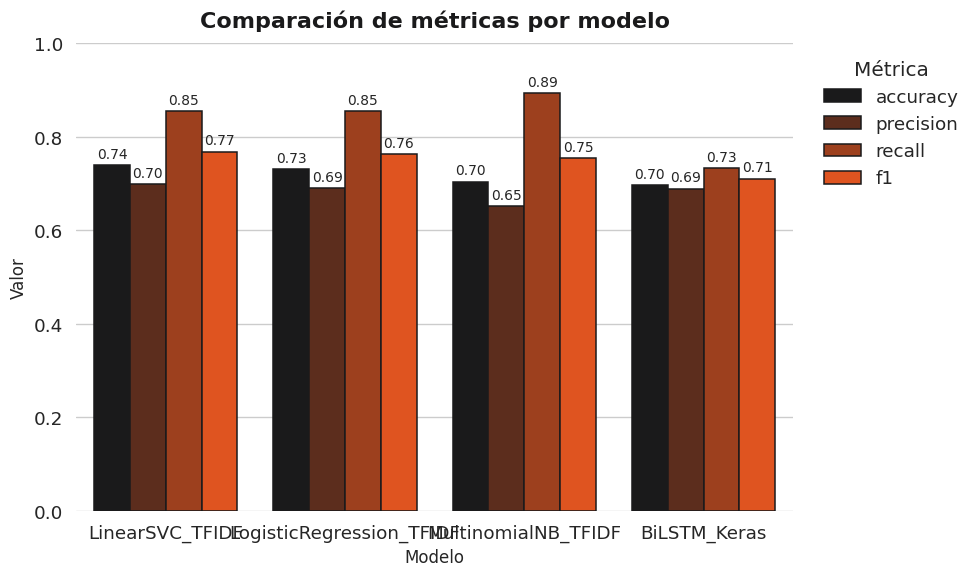

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.2, rc={'axes.facecolor':'#FFFFFF', 'figure.facecolor':'#FFFFFF'})

metrics = ["accuracy", "precision", "recall", "f1"]
model_order = df_results.sort_values("f1", ascending=False)["model"].tolist()

df_long = df_results.melt(
    id_vars=["model"],
    value_vars=metrics,
    var_name="metric",
    value_name="value"
)

df_long["model"] = pd.Categorical(df_long["model"], categories=model_order, ordered=True)
df_long["metric"] = pd.Categorical(df_long["metric"], categories=metrics, ordered=True)

palette = sns.color_palette("blend:#1A1A1B,#FF4500", n_colors=len(metrics))

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_long,
    x="model", y="value", hue="metric",
    order=model_order, hue_order=metrics,
    palette=palette, edgecolor="#1A1A1B", linewidth=1.1
)

for c in ax.containers:
    ax.bar_label(c, fmt="%.2f", padding=3, fontsize=10)

plt.title("Comparación de métricas por modelo", fontsize=16, weight="bold", pad=12, color="#1A1A1B")
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.ylim(0, 1)
plt.legend(title="Métrica", frameon=False, bbox_to_anchor=(1.02, 1), loc="upper left")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [14]:
import joblib
joblib.dump(best_svc, "model_svc_tfidf.joblib")
print("✅ Modelo LinearSVC guardado como 'model_svc_tfidf.joblib'")


✅ Modelo LinearSVC guardado como 'model_svc_tfidf.joblib'


# Página Web

In [15]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.9 MB/s eta 0:00:00


In [16]:
!pip install pyngrok

In [26]:
!streamlit run app.py --server.port 8502 --server.address 0.0.0.0 &>/dev/null &


In [27]:
from pyngrok import ngrok
ngrok.kill()  # limpia túneles previos

public_url = ngrok.connect(8502, "http")
public_url


<NgrokTunnel: "https://boomingly-phyllodial-genevieve.ngrok-free.dev" -> "http://localhost:8502">